<center><h1>Human Activity Recognition: Time-Domain Feature Extraction (AReM Dataset)  </h1></center>
<br>
<br>

## 1. Project Overview
The goal of this analysis is to extract meaningful time-domain features from multisensor time-series data in the AReM dataset. These features form the foundation for binary and multiclass classification tasks completed in the subsequent project.

This notebook:
- Loads and structures the raw AReM time-series data  
- Computes time-domain statistical features  
- Uses bootstrapping to estimate uncertainty in feature variability  
- Selects the strongest features for downstream modeling

## 2. Dataset Description
The AReM dataset contains **88 instances**, each representing one performance of a human activity.  
Each instance consists of **6 time series** with **480 samples** each.

### Activities
The dataset includes 7 activity classes stored across folders:
- bending1  
- bending2  
- cycling  
- lying  
- sitting  
- standing  
- walking  

### Train/Test Split Rules
Following the dataset specifications:
- bending1 & bending2 → datasets 1–2 are test  
- all other folders → datasets 1–3 are test  
- remaining instances constitute the training set  


## 3. Loading and Cleaning the Data

## 3.1 Imports

In [3]:
import pandas as pd 
import os 
import numpy as np
from scipy.stats import bootstrap
!pip install pipreqsnb
!pipreqsnb . 

pipreqs  .
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt



## 3.2 Reading the CLEANED AReM files 

dataset4.csv for bending 2 was cleaned using text to columns 

dataset9.csv and dataset14.csv for cycling had an extra comma at column 485 in TextEdit, so I removed that manually 

dataset8.csv for sitting has a missing row


In [8]:
#dataset4.csv for bending 2 was cleaned using text to columns 
#dataset9.csv and dataset14.csv for cycling had an extra comma at column 485 in TextEdit, so I removed that manually 
#dataset8.csv for sitting has a missing row


bending1_dir = "data/AReM/bending1"
bending_1 = []

for dataset in os.listdir(bending1_dir):
    df = pd.read_csv(os.path.join(bending1_dir,dataset),skiprows = 4) #skip the rows containing explanation of variables 
    bending_1.append(df)

bending2_dir = "data/AReM/bending2"
bending_2 = []

for dataset in os.listdir(bending2_dir):
    df = pd.read_csv(os.path.join(bending2_dir, dataset), skiprows = 4)
    bending_2.append(df)

cycling_dir = "data/AReM/cycling"
cycling = []

for dataset in os.listdir(cycling_dir):
    df = pd.read_csv(os.path.join(cycling_dir, dataset), skiprows = 4)
    cycling.append(df)

lying_dir = "data/AReM/cycling"
lying = []

for dataset in os.listdir(lying_dir):
    df = pd.read_csv(os.path.join(lying_dir, dataset), skiprows = 4)
    lying.append(df)

sitting_dir = "data/AReM/sitting"
sitting = []

for dataset in os.listdir(sitting_dir):
    df = pd.read_csv(os.path.join(sitting_dir, dataset), skiprows = 4)
    sitting.append(df)
    
standing_dir = "data/AReM/standing"
standing = []

for dataset in os.listdir(standing_dir):
    df = pd.read_csv(os.path.join(standing_dir, dataset), skiprows = 4)
    standing.append(df)

walking_dir = "data/AReM/walking"
walking = []

for dataset in os.listdir(walking_dir):
    df = pd.read_csv(os.path.join(walking_dir, dataset), skiprows = 4)
    walking.append(df) 




## 3.3 Combine into a unified dataset
- Total instances: 88  
- Shape: *88 × (6 × 480)*  

In [9]:
#test 
bending1_test = [bending_1[i] for i in [0,1]]
bending2_test = [bending_2[i] for i in [0,1]] 
cycling_test = [cycling[i] for i in [0,1,2]] 
lying_test = [lying[i] for i in [0,1,2]] 
sitting_test = [sitting[i] for i in [0,1,2]] 
standing_test = [standing[i] for i in [0,1,2]] 
walking_test = [walking[i] for i in [0,1,2]]

test_data = bending1_test + bending2_test + cycling_test + lying_test + sitting_test + standing_test + walking_test 

#train 
bending1_train = [bending_1[i] for i in [2,3,4,5,6]]
bending2_train = [bending_2[i] for i in [2,3,4,5]]
cycling_train = [cycling[i] for i in [3,4,5,6,7,8,9,10,11,12,13,14]]
lying_train = [lying[i] for i in [3,4,5,6,7,8,9,10,11,12,13,14]]
sitting_train = [sitting[i] for i in [3,4,5,6,7,8,9,10,11,12,13,14]]
standing_train = [standing[i] for i in [3,4,5,6,7,8,9,10,11,12,13,14]]
walking_train = [walking[i] for i in [3,4,5,6,7,8,9,10,11,12,13,14]]

train_data = bending1_train + bending2_train + cycling_train + lying_train + sitting_train + standing_train + walking_train

### 3.4 Sanity Checks
- Check for missing values  
- Print shapes  
- Optional: preview one raw time series 

Number of training instances: 69
Number of test instances: 19

Checking lengths for train_data:
Instance 0 lengths: [480, 480, 480, 480, 480, 480, 480]
Instance 1 lengths: [480, 480, 480, 480, 480, 480, 480]
Instance 2 lengths: [480, 480, 480, 480, 480, 480, 480]
Instance 3 lengths: [480, 480, 480, 480, 480, 480, 480]
Instance 4 lengths: [480, 480, 480, 480, 480, 480, 480]

Checking lengths for test_data:
Instance 0 lengths: [480, 480, 480, 480, 480, 480, 480]
Instance 1 lengths: [480, 480, 480, 480, 480, 480, 480]
Instance 2 lengths: [480, 480, 480, 480, 480, 480, 480]
Instance 3 lengths: [480, 480, 480, 480, 480, 480, 480]
Instance 4 lengths: [480, 480, 480, 480, 480, 480, 480]

Missing values in train_data:
Instance 0: 0 missing values
Instance 1: 0 missing values
Instance 2: 0 missing values
Instance 3: 0 missing values
Instance 4: 0 missing values

Missing values in test_data:
Instance 0: 0 missing values
Instance 1: 0 missing values
Instance 2: 0 missing values
Instance 3: 0 miss

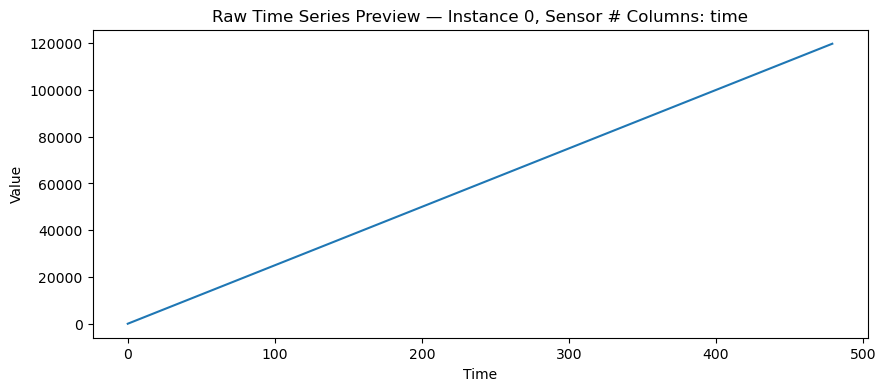

In [11]:
import matplotlib.pyplot as plt 

print("Number of training instances:", len(train_data))
print("Number of test instances:", len(test_data))


def check_lengths(dataset, name):
    print(f"\nChecking lengths for {name}:")
    for idx, inst in enumerate(dataset[:5]):  # print only first 5
        lengths = [len(inst[key]) for key in inst.keys()]
        print(f"Instance {idx} lengths: {lengths}")

check_lengths(train_data, "train_data")
check_lengths(test_data, "test_data")


def count_missing(dataset, name):
    print(f"\nMissing values in {name}:")
    for idx, inst in enumerate(dataset[:5]):  # first 5 only
        missing = sum([np.isnan(inst[key]).sum() for key in inst.keys()])
        print(f"Instance {idx}: {missing} missing values")

count_missing(train_data, "train_data")
count_missing(test_data, "test_data")


sample_idx = 0
sensor_key = list(train_data[sample_idx].keys())[0]   # first sensor in dict

plt.figure(figsize=(10,4))
plt.plot(train_data[sample_idx][sensor_key])
plt.title(f"Raw Time Series Preview — Instance {sample_idx}, Sensor {sensor_key}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

## 4. Time-Domain Feature Engineering

### 4.1 Why statistical features?
Time-domain statistics summarize behavior of each sensor signal, enabling models to detect differences between activities without raw sequence input.

Source: https://stats.stackexchange.com/questions/50807/features-for-time-series-classification

Time-Domain Features Usually Used in Time Series Classification: 
1. Means in each dimension
2. Standard Deviation in each dimension
3. Skewness, Kurtosis, and higher order moments in each dimension
4. maximum and minimum values
5. Cross-Correlations and Auto-Correlations between the features
7. median
8. first quartile
9. third quartile
10. RMS
11. Variance 

### 4.2 Features computed per time series
- minimum  
- maximum  
- mean  
- median  
- standard deviation  
- first quartile (Q1)  
- third quartile (Q3)  

Total features per instance:  
**6 signals × 7 features = 42 features**

### 4.3 Extraction Process
Each instance’s 6 signals are transformed into a single row of 42 engineered features.

In [12]:
#plan: first go through each dataset in each activity and calculate the min,max 
#etc for each time series column (42 total columns) (so use a nested for loop) 
#and append each stat value to that singular row. 
#then append all these rows from each instance in the activity into a big one. And then append each activity big list into one mega list  

#note, i tried to do a nested for loop to go through each activity and then each dataset but it was not working, unsure why so i had to separate them by activity. apologies if it looks very chunky. 
bending1_tfeat = []
for dataset in bending_1:
    eachrow = []
    for feature in dataset.columns[1:7]:
        timeseries = dataset[feature]
        eachrow.append(timeseries.min())
        eachrow.append(timeseries.max())
        eachrow.append(timeseries.mean())
        eachrow.append(timeseries.median())
        eachrow.append(timeseries.std())
        eachrow.append(timeseries.quantile(0.25))
        eachrow.append(timeseries.quantile(0.75))
    bending1_tfeat.append(eachrow)

bending2_tfeat = []
for dataset in bending_2:
    eachrow = []
    for feature in dataset.columns[1:7]:
        timeseries = dataset[feature]
        eachrow.append(timeseries.min())
        eachrow.append(timeseries.max())
        eachrow.append(timeseries.mean())
        eachrow.append(timeseries.median())
        eachrow.append(timeseries.std())
        eachrow.append(timeseries.quantile(0.25))
        eachrow.append(timeseries.quantile(0.75))
    bending2_tfeat.append(eachrow)

cycling_tfeat = []
for dataset in cycling:
    eachrow = []
    for feature in dataset.columns[1:7]:
        timeseries = dataset[feature]
        eachrow.append(timeseries.min())
        eachrow.append(timeseries.max())
        eachrow.append(timeseries.mean())
        eachrow.append(timeseries.median())
        eachrow.append(timeseries.std())
        eachrow.append(timeseries.quantile(0.25))
        eachrow.append(timeseries.quantile(0.75))
    cycling_tfeat.append(eachrow)

lying_tfeat = []
for dataset in lying:
    eachrow = []
    for feature in dataset.columns[1:7]:
        timeseries = dataset[feature]
        eachrow.append(timeseries.min())
        eachrow.append(timeseries.max())
        eachrow.append(timeseries.mean())
        eachrow.append(timeseries.median())
        eachrow.append(timeseries.std())
        eachrow.append(timeseries.quantile(0.25))
        eachrow.append(timeseries.quantile(0.75))
    lying_tfeat.append(eachrow)

sitting_tfeat = []
for dataset in sitting:
    eachrow = []
    for feature in dataset.columns[1:7]:
        timeseries = dataset[feature]
        eachrow.append(timeseries.min())
        eachrow.append(timeseries.max())
        eachrow.append(timeseries.mean())
        eachrow.append(timeseries.median())
        eachrow.append(timeseries.std())
        eachrow.append(timeseries.quantile(0.25))
        eachrow.append(timeseries.quantile(0.75))
    sitting_tfeat.append(eachrow)

standing_tfeat = []
for dataset in standing:
    eachrow = []
    for feature in dataset.columns[1:7]:
        timeseries = dataset[feature]
        eachrow.append(timeseries.min())
        eachrow.append(timeseries.max())
        eachrow.append(timeseries.mean())
        eachrow.append(timeseries.median())
        eachrow.append(timeseries.std())
        eachrow.append(timeseries.quantile(0.25))
        eachrow.append(timeseries.quantile(0.75))
    standing_tfeat.append(eachrow)

walking_tfeat = []
for dataset in walking:
    eachrow = []
    for feature in dataset.columns[1:7]:
        timeseries = dataset[feature]
        eachrow.append(timeseries.min())
        eachrow.append(timeseries.max())
        eachrow.append(timeseries.mean())
        eachrow.append(timeseries.median())
        eachrow.append(timeseries.std())
        eachrow.append(timeseries.quantile(0.25))
        eachrow.append(timeseries.quantile(0.75))
    walking_tfeat.append(eachrow)

#name the tables 

colnames = []
for j in range(1,7):
    colnames += [f"min{j}",f"max{j}",f"mean{j}",f"median{j}",f"std{j}",f"quart1_{j}",f"quart3_{j}"]
    
#build activity tables 
bending1_tbl = pd.DataFrame(bending1_tfeat,columns = colnames)

bending2_tbl = pd.DataFrame(bending2_tfeat, columns = colnames)

cycling_tbl = pd.DataFrame(cycling_tfeat, columns = colnames)

lying_tbl = pd.DataFrame(lying_tfeat, columns = colnames)

sitting_tbl = pd.DataFrame(sitting_tfeat, columns = colnames)

standing_tbl = pd.DataFrame(standing_tfeat, columns = colnames)

walking_tbl = pd.DataFrame(walking_tfeat, columns = colnames)

#large feature table 
feature_table = pd.concat([bending1_tbl, bending2_tbl, cycling_tbl, lying_tbl, sitting_tbl, standing_tbl, walking_tbl])

#for the instance column, moving index up by 1 so first is 1 last is 88, like how it is listed in the homework, and naming index column "Instance"
feature_table.index += 1
feature_table.index.name = "Instance"



### 4.4 Final Feature Matrix
Include:
- `.head()` preview  
- Matrix shape confirmation  

In [14]:
feature_table.head()

,min1,max1,mean1,median1,std1,quart1_1,quart3_1,min2,max2,mean2,...,std5,quart1_5,quart3_5,min6,max6,mean6,median6,std6,quart1_6,quart3_6
Instance,,,,,,,,,,,,,,,,,,,,,
1,36.25,48.00,43.969125,44.50,1.618364,43.31,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.75,0.0,2.96,0.555312,0.49,0.487826,0.00,0.83
2,37.00,48.00,43.454958,43.25,1.386098,42.50,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.00,0.0,5.26,0.679646,0.50,0.622534,0.43,0.87
3,33.00,47.75,42.179812,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.00,1.00
4,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.00,0.50
5,37.25,45.00,40.624792,40.50,1.476967,39.25,42.00,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.43,0.582915,0.00,1.30


## 5. Bootstrapped Confidence Intervals (90%)

### 5.1 Method
Bootstrapping is used to estimate uncertainty in the standard deviation of each feature by sampling with replacement.

### 5.2 Computing Bootstrapped SDs
- 1,000 bootstrap samples  
- Extract SD for each replicate  
- Form 90% confidence intervals  

In [15]:

#standard deviation function
def standarddev(x,axis = 0):
    return np.std(x, ddof =1,axis = axis)

instance = []

for columnn in feature_table.columns:
    x = feature_table[columnn].to_numpy() 
    bootstrap_metrics = bootstrap(data = (x,),statistic = standarddev, n_resamples = 4000, 
                    confidence_level = 0.90, method = "percentile" ,rng = np.random.default_rng(67)) 
    instance.append([columnn,np.std(x), bootstrap_metrics.confidence_interval.low, bootstrap_metrics.confidence_interval.high]) 

stdev_confint = pd.DataFrame(instance,columns = ["feature","standard deviation","low confidence interval","high confidence interval"])


### 5.3 Results Table

In [16]:
stdev_confint

,feature,standard deviation,low confidence interval,high confidence interval
0,min1,8.176950,7.189500,9.201575
1,max1,2.489634,1.814035,3.199066
2,mean1,4.474370,3.967373,5.017958
3,median1,4.705827,4.181391,5.268330
4,std1,1.434038,1.258390,1.609391
5,quart1_1,5.407202,4.902949,5.918265
6,quart3_1,3.846646,3.218622,4.499956
7,min2,0.052996,0.000000,0.091251
8,max2,4.864209,4.530975,5.196774
9,mean2,1.530630,1.416024,1.636189


## 6. Feature Selection

### 6.1 Selection Criteria
Features were evaluated using:
- Bootstrapped variability  
- Distributional separation across activities  
- Interpretability and relevance  

### 6.2 Selected Features
The three strongest features:
- **min**  
- **mean**  
- **max**

These are used in the logistic regression models constructed in the next project stage.


## 7. Summary
- Loaded and cleaned 88 multivariate time series  
- Created a 42-feature representation for each instance  
- Estimated feature variability using bootstrapping  
- Identified min/mean/max as optimal for downstream classification  
- Saved a structured feature matrix for modeling in second notebook

## References Used For Aid: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html
<br>
https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng
<br>
https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
<br>
https://docs.python.org/3/library/os.path.html#module-os.path